In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# Check if there are any non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Drop the null values and save it into the original data frame.
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

# Let 'X' be the data frame without the target variable.
X = data.drop(['median_house_value'], axis=1)
# Let 'y' be the data frame with only the target variable.
y = data['median_house_value']

# Split the data into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Join the train data for exploration.
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN,184000.0
16287,-121.28,37.91,31.0,820.0,179.0,576.0,155.0,1.6900,INLAND,65900.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,340600.0
9531,-120.46,37.51,22.0,2704.0,497.0,1432.0,399.0,2.9000,INLAND,83100.0
10279,-117.82,33.89,24.0,2168.0,421.0,1050.0,397.0,4.6172,<1H OCEAN,238300.0
...,...,...,...,...,...,...,...,...,...,...
10233,-117.89,33.86,28.0,1395.0,398.0,1220.0,362.0,3.3008,<1H OCEAN,193800.0
553,-122.26,37.77,52.0,2097.0,444.0,915.0,413.0,2.9899,NEAR BAY,228100.0
16393,-121.22,38.04,42.0,343.0,50.0,116.0,49.0,5.5376,INLAND,212500.0
1935,-120.99,38.67,8.0,4913.0,744.0,2005.0,723.0,5.4413,INLAND,187900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

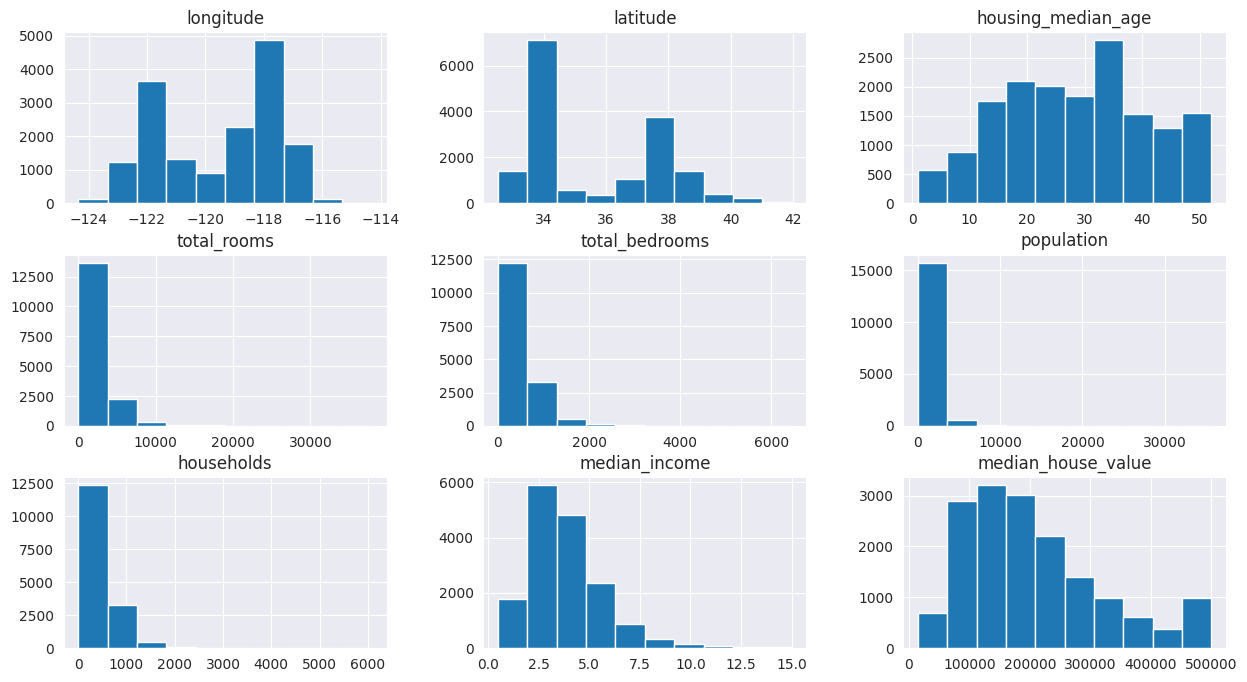

In [9]:
# Draw a histogram to show comparison
train_data.hist(figsize=(15, 8))